In [80]:
import numpy as np
from utils import get_lenet
from load_mnist import load_mnist
from scipy.io import loadmat
from conv_net import convnet_forward
from init_convnet import init_convnet
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [2]:
# Load the model architecture
layers = get_lenet()
params = init_convnet(layers)

In [3]:
# Load the network
data = loadmat('../results/lenet.mat')
params_raw = data['params']

In [4]:
for params_idx in range(len(params)):
    raw_w = params_raw[0,params_idx][0,0][0]
    raw_b = params_raw[0,params_idx][0,0][1]
    assert params[params_idx]['w'].shape == raw_w.shape, 'weights do not have the same shape'
    assert params[params_idx]['b'].shape == raw_b.shape, 'biases do not have the same shape'
    params[params_idx]['w'] = raw_w
    params[params_idx]['b'] = raw_b

In [5]:
# Load data
fullset = False
xtrain, ytrain, xvalidate, yvalidate, xtest, ytest = load_mnist(fullset)

In [6]:
xtest.shape

(784, 500)

In [20]:
# Testing the network
#### Modify the code to get the confusion matrix ####
all_preds = []
true_labels = []

In [21]:
for i in range(0, xtest.shape[1], 100):
    # print(i)
    cptest, P = convnet_forward(params, layers, xtest[:,i:i+100], test=True)
    all_preds.append(P)
    true_labels.extend(ytest[:, i:i+100])

In [22]:
all_preds[4].shape # 5 tests of batches 100

(10, 100)

In [23]:
# # Combine all the predictions into a single numpy array
y_pred = np.concatenate(all_preds, axis=1)


In [50]:
y_pred[:,1]

array([4.20297599e-10, 8.11964638e-10, 9.99999991e-01, 5.86572527e-10,
       2.30634835e-17, 3.81776191e-18, 3.57956640e-23, 3.01997537e-14,
       6.99427501e-09, 1.91509439e-12])

In [32]:

y_true = np.array(true_labels).flatten()

In [73]:
y_true.shape

(500,)

In [67]:
y_true[1]

2.0

In [61]:
y_pred[:,0]

array([6.52987340e-02, 3.54851120e-14, 1.24387071e-09, 1.04290730e-10,
       1.26545076e-16, 1.38166496e-09, 5.50614385e-11, 1.69524217e-18,
       9.34701247e-01, 1.57188246e-08])

In [68]:
y_pred.shape[1]

500

In [69]:
#find the index of max value in y_pred array
np.argmax(y_pred[:,1])

y_pred_val = []

# go through all the y_preds and get the index representing the predicted digit and store it
for i in range(y_pred.shape[1]):
    y_pred_val.append(np.argmax(y_pred[:,i]))


In [54]:
labels=[0,1,2,3,4,5,6,7,8,9]

In [72]:

y_pred_flatten = np.array(y_pred_val).flatten()
y_pred_flatten.shape

(500,)

In [74]:
cm = confusion_matrix(y_true, y_pred_flatten, labels=labels)

In [75]:
print(cm)

[[47  0  0  0  0  0  2  0  0  0]
 [ 0 50  0  0  0  0  0  0  0  0]
 [ 0  0 47  2  0  0  0  1  0  0]
 [ 0  0  3 60  0  3  0  2  0  0]
 [ 0  1  1  0 40  1  0  0  1  2]
 [ 1  0  0  1  0 38  0  1  0  2]
 [ 0  1  0  0  0  0 41  0  0  0]
 [ 0  0  1  0  0  0  0 48  0  1]
 [ 1  0  0  0  0  0  0  0 48  2]
 [ 0  1  0  0  3  0  0  1  2 44]]


In [83]:
cm_disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)

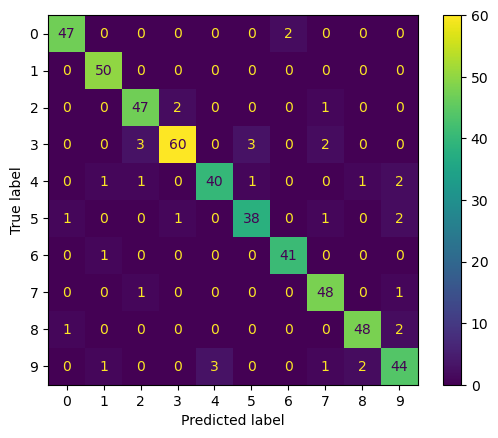

In [90]:
cm_disp.plot()

In [94]:
cm_disp.figure_.suptitle('Confusion Matrix')

Text(0.5, 0.98, 'Confusion Matrix')

In [88]:
plt.show()

In [95]:
cm_disp.figure_.savefig('../results/confusion_matrix.png',dpi=300)

In [ ]:
# # Initialize an empty list to store all the predictions and true labels
# all_preds = []
# true_labels = []

# # Loop through the test data in batches of 100 as you did before
# for i in range(0, xtest.shape[1], 100):
#     cptest, P = convnet_forward(params, layers, xtest[:, i:i+100], test=True)
    
#     # Append the batch predictions to the list of predictions
#     all_preds.append(P)
    
#     # Append the true labels of this batch to the list of true labels
#     true_labels.extend(ytest[:, i:i+100])

# # Combine all the predictions into a single numpy array
# y_pred = np.concatenate(all_preds, axis=1)

# # Flatten the list of true labels into a 1D numpy array
# y_true = np.array(true_labels).flatten()

# # Calculate the confusion matrix
# confusion = confusion_matrix(y_true, np.argmax(y_pred, axis=0))

# # Print or use the confusion matrix as needed
# print(confusion)